In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv(r"D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\RawData\knn_breast_cancer_wisconsin_diagnostic_data\wdbc.data", header=None)


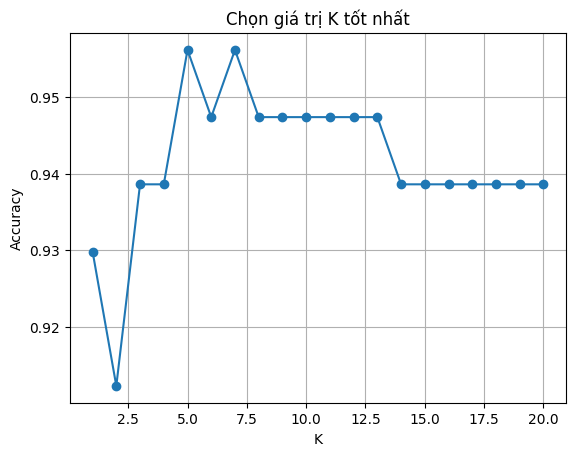

Giá trị K tốt nhất: 5
Độ chính xác: 0.956140350877193
Ma trận nhầm lẫn:
 [[71  1]
 [ 4 38]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [2]:
# Đặt tên cột
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
df.columns = columns

# Tiền xử lý
df = df.drop('ID', axis=1)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Tìm giá trị K tốt nhất
accuracies = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Vẽ biểu đồ chọn K
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Chọn giá trị K tốt nhất')
plt.grid()
plt.show()

# Huấn luyện mô hình với K tối ưu
best_k = np.argmax(accuracies) + 1
print("Giá trị K tốt nhất:", best_k)

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Kết quả
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("Ma trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
print("Báo cáo phân loại:\n", classification_report(y_test, y_pred))